In [1]:
from utils import load_results_policies, load_cross_results, load_config
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from games import get_game

In [2]:
def add_noise(xs, ys, mag=0.2):
    nx = (0.5 - np.random.rand(len(xs))) * mag
    ny = (0.5 - np.random.rand(len(xs))) * mag
    xs = np.array(xs) + nx
    ys = np.array(ys) + ny
    return xs, ys

def plot_from_folder(folder):
    r1s, r2s, _, _ = load_results_policies(folder)
    xr1s, xr2s = load_cross_results(folder)
    noise_mag = 0
    r1s, r2s = add_noise(r1s, r2s, mag=noise_mag)
    xr1s, xr2s = add_noise(xr1s, xr2s, mag=noise_mag)

    sns.scatterplot(x=r1s, y=r2s, fc='none', ec='orange', linewidth=1.3)
    sns.scatterplot(x=xr1s, y=xr2s, fc='none', ec='blue', linewidth=1.3)

    config = load_config(folder)
    env = get_game(**config, max_steps=100)

    polygon = env.outcomes_polygon()
    plt.fill(polygon[0], polygon[1], alpha=0.1, color='purple')


# Pure prisoner's Dilemma
Look at results for pure iterated Prisoner's Dilemma, for naive and lola updates

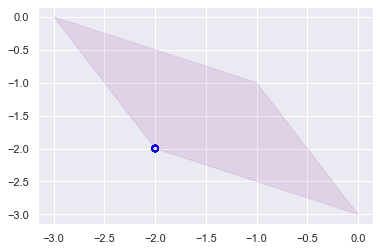

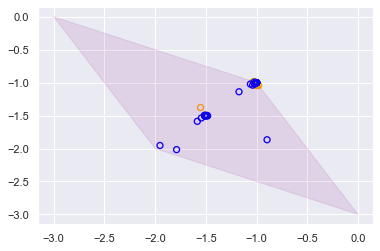

In [3]:
plot_from_folder("PD_naive_results")
plt.show()
plot_from_folder("PD_lola_results")

# Noisy Prisoner's Dilemma

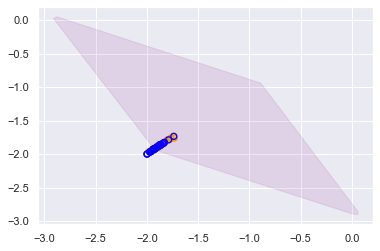

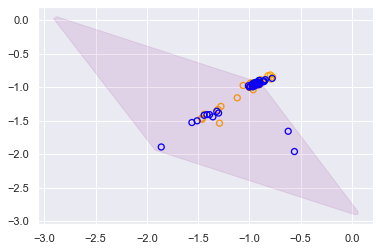

In [4]:
plot_from_folder("PD97_naive_results")
plt.show()
plot_from_folder("PD97_lola_results")

# Game from Distribution vs Information
Oneshot game, with p=0.7 and a=2

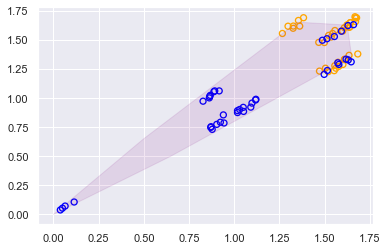

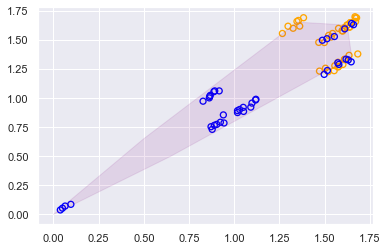

In [5]:
plot_from_folder("DistInf_naive_oneshot_1")
plt.show()
plot_from_folder("DistInf_lola_oneshot_1")

In [6]:
sns.set_theme(style="white")
def policy_coord(p):
    coord = 0
    if p[0][4] < 0.05:
        coord += 2
    if p[1][4] < 0.05:
        coord += 1
    if p[0][4] > 0.05 and p[0][4] < 0.95:
        if p[1][4] > 0.05 and p[1][4] < 0.95:
            coord = 5
    return coord

def policies_to_coords(ps):
    coords = [policy_coord(p) for p in ps]
    return coords

def coords_to_heatmap(c1s, c2s):
    hmap = [[0 for _ in range(5)] for _ in range(5)]
    for c1, c2 in zip(c1s, c2s):
        hmap[4-c1][c2] += 1
    return hmap

def plot_oneshot_policies(folder):
    r1s, r2s, p1s, p2s = load_results_policies(folder)
    c1s = policies_to_coords(p1s)
    c2s = policies_to_coords(p2s)
    hmap = coords_to_heatmap(c1s, c2s)
    labels = ['AA', 'AB', 'BA', 'BB', 'None']
    cmap = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
    sns.heatmap(data=hmap, xticklabels=labels, yticklabels=list(reversed(labels)), cmap=cmap, linewidths=.5, annot=True)

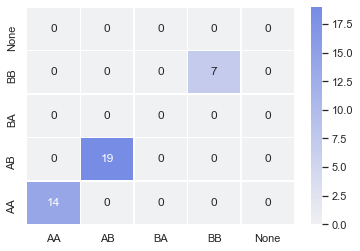

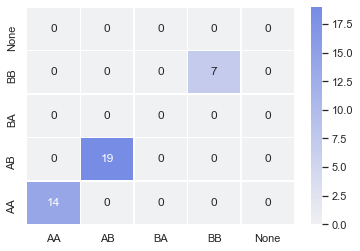

In [7]:
plot_oneshot_policies("DistInf_naive_oneshot_1")
plt.show()
plot_oneshot_policies("DistInf_lola_oneshot_1")

In [13]:
def coord_to_strat(cs):
    labels = ['AA', 'AB', 'BA', 'BB', 'None']
    return [labels[c] for c in cs]

def plot_res_with_pol(folder):
    r1s, r2s, p1s, p2s = load_results_policies(folder)
    xr1s, xr2s = load_cross_results(folder)
    c1s = policies_to_coords(p1s)
    c2s = policies_to_coords(p2s)

    noise_mag = 0
    r1s, r2s = add_noise(r1s, r2s, mag=noise_mag)
    xr1s, xr2s = add_noise(xr1s, xr2s, mag=noise_mag)

    sns.scatterplot(x=r1s, y=r2s, hue=coord_to_strat(c1s), linewidth=1.3)
    # sns.scatterplot(x=xr1s, y=xr2s, fc='none', ec='blue', linewidth=1.3)

    config = load_config(folder)
    env = get_game(**config, max_steps=100)

    polygon = env.outcomes_polygon()
    plt.fill(polygon[0], polygon[1], alpha=0.1, color='purple')

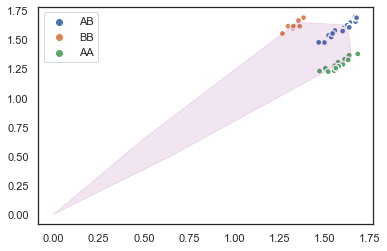

In [14]:
plot_res_with_pol("DistInf_naive_oneshot_1")